<a href="https://colab.research.google.com/github/vivekbiragoni/Deep_Learning/blob/main/ffn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""" Demonstrates the easy of integration of a custom layer """
import math
import torch
import torch.nn as nn
import numpy as np

In [2]:


class MyLinearLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super(MyLinearLayer, self).__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        w_times_x = torch.mm(x, self.weights.t())
        return torch.add(w_times_x, self.bias)  # w times x + b


In [3]:

class FeedForwardNetwork(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(FeedForwardNetwork, self).__init__()

        # Define the layers
        self.custom_fc1 = MyLinearLayer(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.custom_fc2 = MyLinearLayer(hidden_units, hidden_units)
        self.custom_fc3 = MyLinearLayer(hidden_units, output_size)

    def forward(self, x):
        x = self.custom_fc1(x)
        x = self.relu(x)
        x = self.custom_fc2(x)
        x = self.relu(x)
        x = self.custom_fc3(x)
        return x



In [ ]:
# Define the input size, hidden units, and output size
input_size = 64  # You can replace this with the appropriate input size
hidden_units = 32  # Number of units in the hidden layers
output_size = 2  # Number of output features for classification

# Create an instance of the FeedForwardNetwork
ff_network = FeedForwardNetwork(input_size, hidden_units, output_size)

# Print the network architecture
print(ff_network)


FeedForwardNetwork(
  (custom_fc1): MyLinearLayer()
  (relu): ReLU()
  (custom_fc2): MyLinearLayer()
  (custom_fc3): MyLinearLayer()
)


In [4]:
import pandas as pd

# Provide the file path
file_path = "/content/drive/MyDrive/data/booking.csv"

# Read the CSV file into a Pandas DataFrame
booking_data = pd.read_csv(file_path)

# Display the contents of the DataFrame
booking_data.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
# Get the feature names (column names) from the DataFrame
feature_names = booking_data.columns.tolist()

# Display the feature names
print("Feature Names:", feature_names)


Feature Names: ['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


In [6]:
# Specify the columns you want to drop
columns_to_drop = ['Booking_ID', 'type of meal', 'room type', "date of reservation"]

# Use the drop method to remove the specified columns
booking_data.drop(columns=columns_to_drop, inplace=True)
booking_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,0,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,0,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,0,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,0,48,Online,0,0,0,77.00,0,Canceled


In [7]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the "Market Segment Type" column
booking_data['market segment type'] = label_encoder.fit_transform(booking_data['market segment type'])
booking_data['booking status'] = label_encoder.fit_transform(booking_data['booking status'])
booking_data.head()


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,3,0,0,0,88.00,0,1
1,1,0,1,3,0,5,4,0,0,0,106.68,1,1
2,2,1,1,3,0,1,4,0,0,0,50.00,0,0
3,1,0,0,2,0,211,4,0,0,0,100.00,1,0
4,1,0,1,2,0,48,4,0,0,0,77.00,0,0


In [8]:
X = booking_data.drop(['booking status'], axis=1)
y = booking_data['booking status']

In [9]:
X.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests
0,1,1,2,5,0,224,3,0,0,0,88.00,0
1,1,0,1,3,0,5,4,0,0,0,106.68,1
2,2,1,1,3,0,1,4,0,0,0,50.00,0
3,1,0,0,2,0,211,4,0,0,0,100.00,1
4,1,0,1,2,0,48,4,0,0,0,77.00,0


In [10]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: booking status, dtype: int64

In [11]:
X.shape

(36285, 12)

In [12]:
y.shape

(36285,)

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary set (80% train + validation, 20% test)
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation sets (75% train, 25% validation from the original dataset)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25, random_state=42)

# Display the shapes of the sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_validation.shape, y_validation.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (21771, 12) (21771,)
Validation set: (7257, 12) (7257,)
Test set: (7257, 12) (7257,)


In [14]:
import torch

# Convert X_train, X_validation, X_test to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Convert y_train, y_validation, y_test to PyTorch tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [15]:
# Check the present data type and device of X_train_tensor
print("Type:", type(X_train_tensor))
print("Data Type:", X_train_tensor.dtype)
print("Device:", X_train_tensor.device)


Type: <class 'torch.Tensor'>
Data Type: torch.float32
Device: cpu


In [ ]:
import torch.nn as nn

class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(MyNeuralNetwork, self).__init__()

        # Define the layers
        self.custom_fc1 = MyLinearLayer(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.custom_fc2 = MyLinearLayer(hidden_units, hidden_units//2)
        self.custom_fc3 = MyLinearLayer(hidden_units//2, output_size)

    def forward(self, x):
        x = self.custom_fc1(x)
        x = self.relu(x)
        x = self.custom_fc2(x)
        x = self.relu(x)
        x = self.custom_fc3(x)
        return x


In [ ]:
# Assuming X_train has the shape (num_samples, num_features)
model = MyNeuralNetwork(input_size=X_train.shape[1], hidden_units=X_train.shape[1]//2, output_size=2)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Assuming you have your data in PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)


criterion = nn.CrossEntropyLoss()  # For binary classification, use BCELoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Forward pass
output = model(X_train_tensor)

# # Print the output shape
print("Output Shape:", output.shape)
# print("Device:", X_train_tensor.device)

Output Shape: torch.Size([21771, 2])


Streaming output truncated to the last 5000 lines.
Epoch [15001/20000], Loss: 0.3865
Epoch [15002/20000], Loss: 0.3863
Epoch [15003/20000], Loss: 0.3862
Epoch [15004/20000], Loss: 0.3861
Epoch [15005/20000], Loss: 0.3862
Epoch [15006/20000], Loss: 0.3863
Epoch [15007/20000], Loss: 0.3865
Epoch [15008/20000], Loss: 0.3865
Epoch [15009/20000], Loss: 0.3862
Epoch [15010/20000], Loss: 0.3861
Epoch [15011/20000], Loss: 0.3862
Epoch [15012/20000], Loss: 0.3864
Epoch [15013/20000], Loss: 0.3868
Epoch [15014/20000], Loss: 0.3867
Epoch [15015/20000], Loss: 0.3863
Epoch [15016/20000], Loss: 0.3861
Epoch [15017/20000], Loss: 0.3861
Epoch [15018/20000], Loss: 0.3861
Epoch [15019/20000], Loss: 0.3862
Epoch [15020/20000], Loss: 0.3862
Epoch [15021/20000], Loss: 0.3863
Epoch [15022/20000], Loss: 0.3864
Epoch [15023/20000], Loss: 0.3862
Epoch [15024/20000], Loss: 0.3861
Epoch [15025/20000], Loss: 0.3862
Epoch [15026/20000], Loss: 0.3862
Epoch [15027/20000], Loss: 0.3863
Epoch [15028/20000], Loss: 0.38

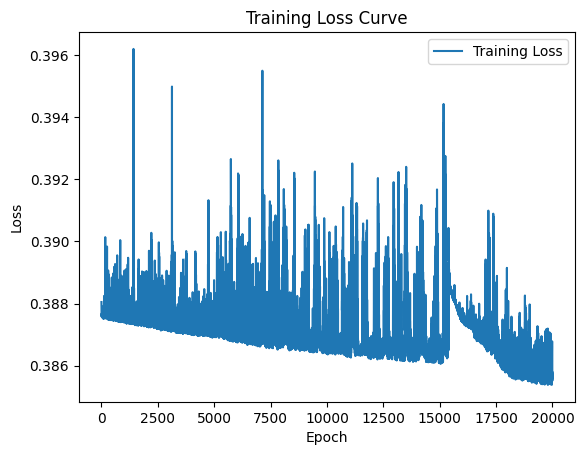

In [ ]:
from matplotlib import pyplot as plt
num_epochs = 20000
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)

    # Calculate the loss
    loss = criterion(outputs, y_train_tensor.long())  # Assuming your target is integer (class indices)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print the loss for monitoring training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Plotting the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

After around 15k ephocs there is plateau observerd here.. no promising improvements are seeen as the model has probably learnt the weights.

In [ ]:
import torch.nn as nn

class MyNeuralNetwork_increasing(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(MyNeuralNetwork_increasing, self).__init__()

        # Define the layers
        self.custom_fc1 = MyLinearLayer(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.custom_fc2 = MyLinearLayer(hidden_units, hidden_units*2)
        self.custom_fc3 = MyLinearLayer(hidden_units*2, output_size)

    def forward(self, x):
        x = self.custom_fc1(x)
        x = self.relu(x)
        x = self.custom_fc2(x)
        x = self.relu(x)
        x = self.custom_fc3(x)
        return x


In [ ]:
# Assuming X_train has the shape (num_samples, num_features)
model = MyNeuralNetwork_increasing(input_size=X_train.shape[1], hidden_units=X_train.shape[1]//2, output_size=2)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Assuming you have your data in PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)


criterion = nn.CrossEntropyLoss()  # For binary classification, use BCELoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Forward pass
output = model(X_train_tensor)

# # Print the output shape
print("Output Shape:", output.shape)
# print("Device:", X_train_tensor.device)

Output Shape: torch.Size([21771, 2])


Streaming output truncated to the last 5000 lines.
Epoch [15001/20000], Loss: 0.3897
Epoch [15002/20000], Loss: 0.3898
Epoch [15003/20000], Loss: 0.3899
Epoch [15004/20000], Loss: 0.3901
Epoch [15005/20000], Loss: 0.3905
Epoch [15006/20000], Loss: 0.3913
Epoch [15007/20000], Loss: 0.3915
Epoch [15008/20000], Loss: 0.3917
Epoch [15009/20000], Loss: 0.3912
Epoch [15010/20000], Loss: 0.3908
Epoch [15011/20000], Loss: 0.3903
Epoch [15012/20000], Loss: 0.3900
Epoch [15013/20000], Loss: 0.3898
Epoch [15014/20000], Loss: 0.3897
Epoch [15015/20000], Loss: 0.3899
Epoch [15016/20000], Loss: 0.3903
Epoch [15017/20000], Loss: 0.3907
Epoch [15018/20000], Loss: 0.3914
Epoch [15019/20000], Loss: 0.3916
Epoch [15020/20000], Loss: 0.3912
Epoch [15021/20000], Loss: 0.3907
Epoch [15022/20000], Loss: 0.3900
Epoch [15023/20000], Loss: 0.3897
Epoch [15024/20000], Loss: 0.3899
Epoch [15025/20000], Loss: 0.3904
Epoch [15026/20000], Loss: 0.3909
Epoch [15027/20000], Loss: 0.3911
Epoch [15028/20000], Loss: 0.39

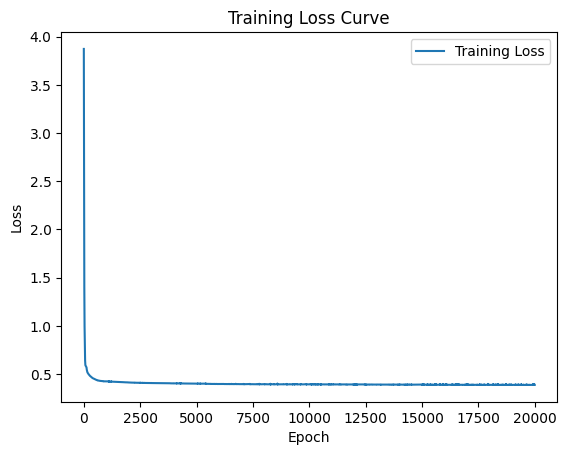

In [ ]:
from matplotlib import pyplot as plt
num_epochs = 20000
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)

    # Calculate the loss
    loss = criterion(outputs, y_train_tensor.long())  # Assuming your target is integer (class indices)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print the loss for monitoring training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Plotting the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()